In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# importing dependencies
import os, sys
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# some constants
INPUT_DIR = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset"
IMAGE_SIDE_SIZE = 128

CLASS_NAMES = ["elliptical", "spiral", "irregular", "invalid"]

In [ ]:
# loading the data into memory
X = np.load(os.path.join(INPUT_DIR, "images.npy"))
y = np.load(os.path.join(INPUT_DIR, "labels.npy"))

In [ ]:
# checking if data is loaded properly
print(X.shape)
print(y.shape)

(3820, 128, 128, 3)
(3820,)


In [ ]:
# loading dependencies for data-loading
from sklearn.model_selection import train_test_split
from keras.utils import  to_categorical

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [ ]:
# one-hot encoding 
y_test = to_categorical(y_test, num_classes=4)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
# loading dependencies for deep learning!

from keras.models import  Model
from keras.layers import Input, Dropout, Flatten, Dense, AveragePooling2D

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# this is the best model hyperparameters after many runs!

dropout_rate = 0.25

ip = Input(shape = (IMAGE_SIDE_SIZE, IMAGE_SIDE_SIZE, 3))

# temp = Conv2D(filters = 3, kernel_size= (3,3), strides=(4,4), padding = "same", activation="relu")(ip)
temp = AveragePooling2D(pool_size=(4,4), padding = "same")(ip)# resizing with GPU

temp = Flatten()(temp)
temp = Dropout(dropout_rate)(temp)
temp = Dense(units = 8, activation= "relu")(temp)
temp = Dropout(dropout_rate)(temp)
op = Dense(units = 4, activation="softmax")(temp)

model = Model(inputs = ip, outputs = op)

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 24584     
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36  

In [ ]:
# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
# setting up the training hyper-parameters
epochs = 200
batch_size = 64

callbacks = [
    EarlyStopping(monitor="val_loss", patience=30, verbose=1, restore_best_weights=True),
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=0.00001, verbose=1)
]

In [ ]:
# training the model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split = 0.2,
    verbose=1,
    shuffle = True
)

Epoch 1/200
34/34 [==============================] - 1s 15ms/step - loss: 1.1639 - accuracy: 0.3495 - val_loss: 0.9175 - val_accuracy: 0.5925
Epoch 2/200
34/34 [==============================] - 0s 11ms/step - loss: 0.9486 - accuracy: 0.6000 - val_loss: 0.8840 - val_accuracy: 0.6374
Epoch 3/200
34/34 [==============================] - 0s 11ms/step - loss: 0.9354 - accuracy: 0.6361 - val_loss: 0.8731 - val_accuracy: 0.6542
Epoch 4/200
34/34 [==============================] - 0s 11ms/step - loss: 0.8975 - accuracy: 0.6317 - val_loss: 0.8373 - val_accuracy: 0.6766
Epoch 5/200
34/34 [==============================] - 0s 11ms/step - loss: 0.8779 - accuracy: 0.6437 - val_loss: 0.8258 - val_accuracy: 0.6804
Epoch 6/200
34/34 [==============================] - 0s 11ms/step - loss: 0.8191 - accuracy: 0.6674 - val_loss: 0.8268 - val_accuracy: 0.6860
Epoch 7/200
34/34 [==============================] - 0s 11ms/step - loss: 0.8241 - accuracy: 0.6763 - val_loss: 0.7995 - val_accuracy: 0.6822
Epoch 

36/36 [==============================] - 0s 5ms/step - loss: 0.5114 - accuracy: 0.8665


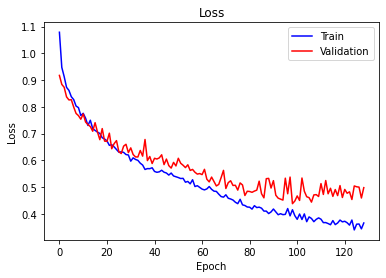

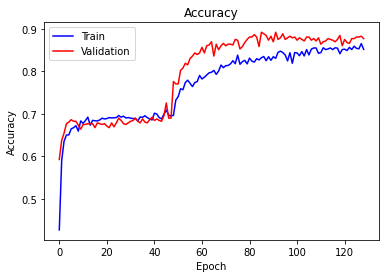

[[250  38   5   1]
 [ 59 226   5   0]
 [  4   0 283  30]
 [  1   0  10 234]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       294
           1       0.86      0.78      0.82       290
           2       0.93      0.89      0.91       317
           3       0.88      0.96      0.92       245

    accuracy                           0.87      1146
   macro avg       0.87      0.87      0.87      1146
weighted avg       0.87      0.87      0.87      1146



In [ ]:
# plotting the training logs and graphs etc

model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

plot_history(history)

y_test_pred = model.predict(X_test)
y_test_pred_sparse = np.argmax(y_test_pred, axis = -1).reshape(-1)
y_test_sparse = np.argmax(y_test, axis = -1).reshape(-1)


from sklearn.metrics import  confusion_matrix, classification_report
print(confusion_matrix(y_test_sparse, y_test_pred_sparse))
print(classification_report(y_test_sparse, y_test_pred_sparse))

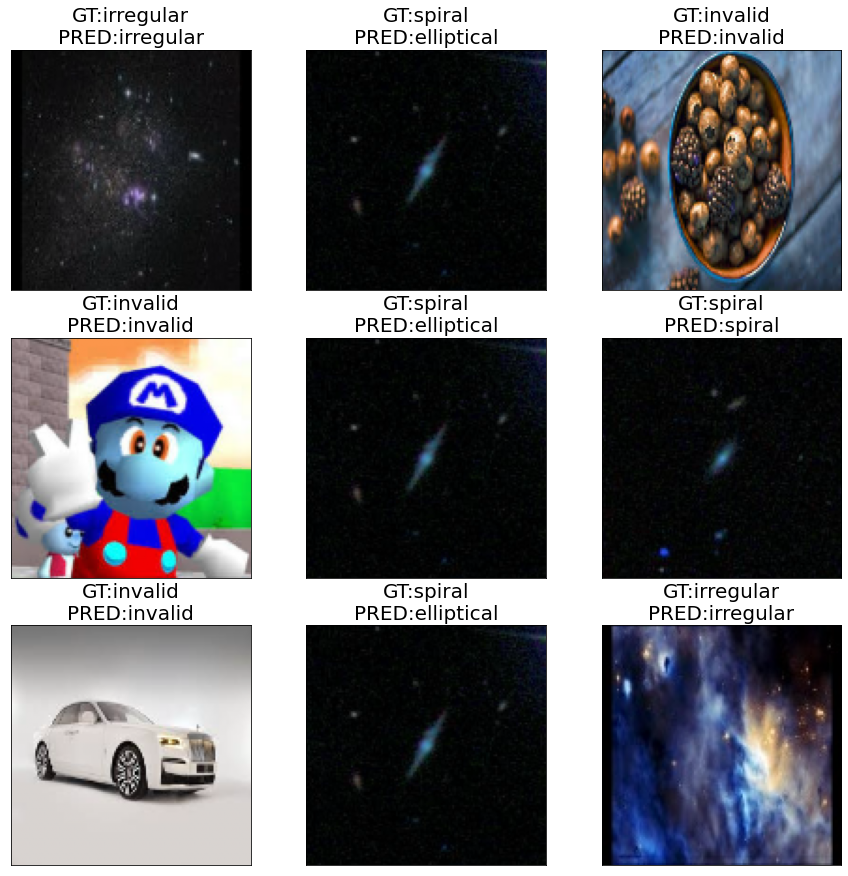

In [ ]:
# generating some predictions

import random
# sample images
cols = 3
rows = 3
plt.figure(figsize=(cols*5, rows*5))

h_test = model.predict(X_test)
h_test_sparse = np.argmax(h_test, axis = -1)
y_test_sparse = np.argmax(y_test, axis = -1)

for i in range(rows):
  for j in range(cols):
    ax = plt.subplot(rows, cols, i*cols + j+1)
    indx = random.randint(0, y_test.shape[0]-1)

    gt = y_test_sparse[indx]
    pred = h_test_sparse[indx]
    title_string = "GT:" + str(CLASS_NAMES[gt]) + "\nPRED:" + str(CLASS_NAMES[pred])

    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(title_string, fontdict={"fontsize": 20})
    ax.imshow(X_test[indx])



# plt.imshow(images[2647])
# print("Actual=", df.Actual[2647])
# print("Prediction=" ,df.Predicted[2647])

In [ ]:
# saving the models
model.save(os.path.join("/gdrive/Shareddrives/ALDA_Project/data/cnn", "mlp_model.h5"))